In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sbn
import matplotlib.pyplot as plt


In [ ]:
dataFrame = pd.read_excel("merc.xlsx")

In [ ]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


# Understanding Data

In [ ]:
# Fundemental statistic values about data
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
dataFrame.shape

(13119, 7)

In [ ]:
# Check how many NaN cell in dataset:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

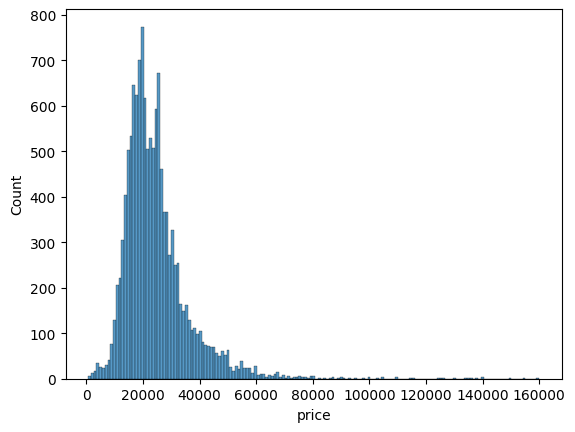

In [ ]:
# Check distribution graphs:
sbn.histplot(dataFrame["price"])

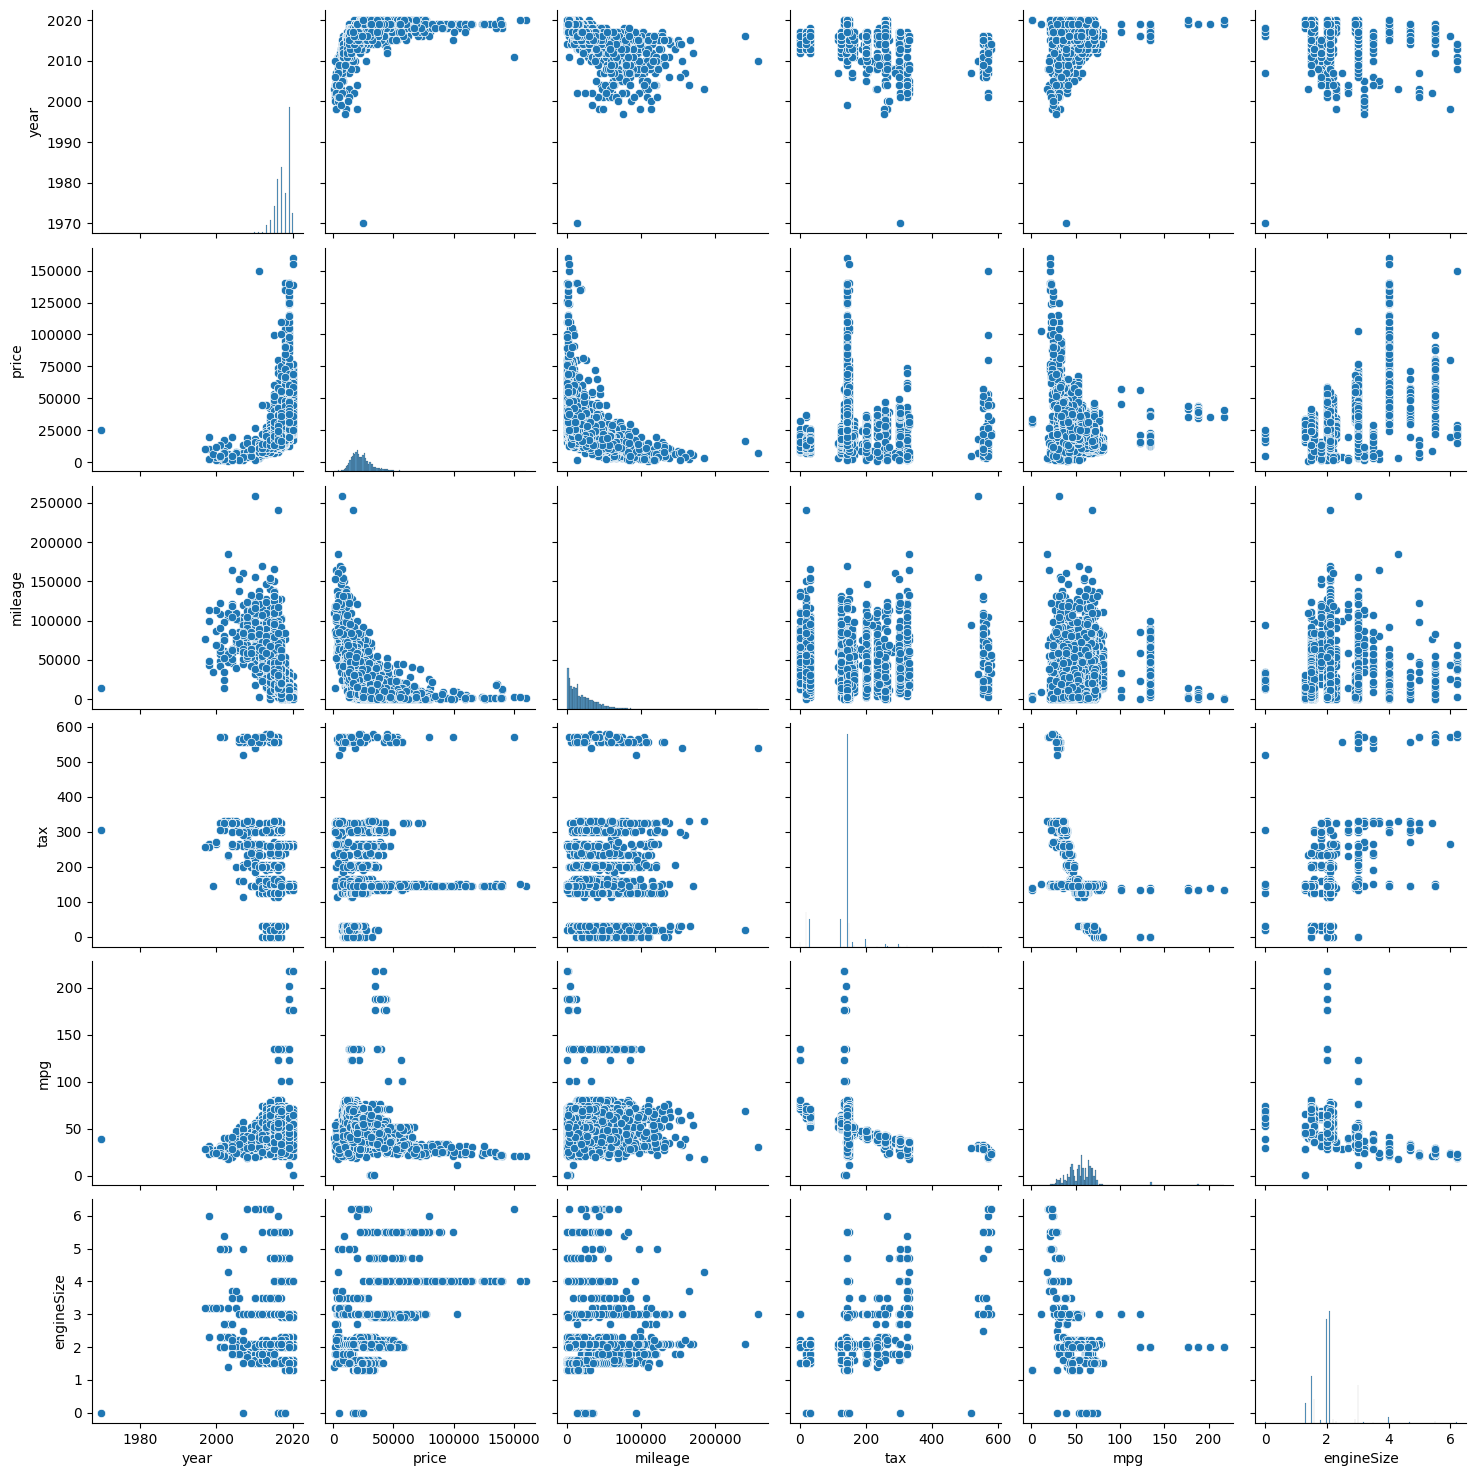

In [ ]:
# Data visually:
sbn.pairplot(dataFrame)

# Which feature affects the price relationally and how

 ❌  I continue with numeric dataframe since non-numeric values always give error: Drop transmission column:

In [ ]:
dataFrame = dataFrame.drop("transmission", axis =1)

In [ ]:
# Correlations between data

dataFrame.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [ ]:
# Show just correlations between features and price that target lable
dataFrame.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

The year is the feature that affects the price the most

<Axes: xlabel='mileage', ylabel='price'>

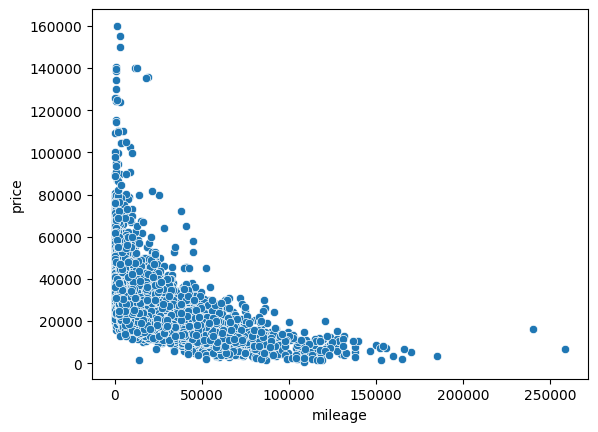

In [ ]:
sbn.scatterplot(x ="mileage", y= "price", data = dataFrame )

<Axes: xlabel='year', ylabel='price'>

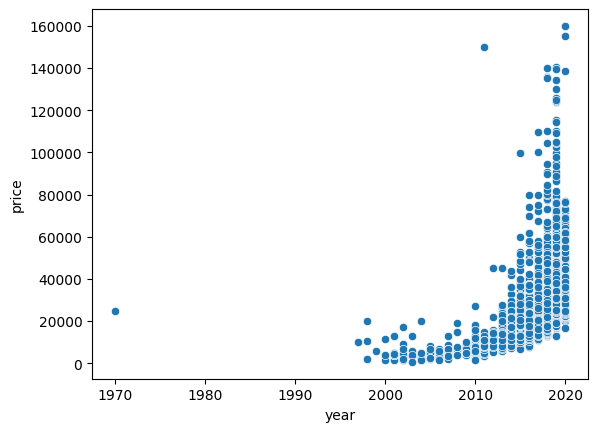

In [ ]:
sbn.scatterplot(x = "year", y = "price", data= dataFrame)

<Axes: xlabel='tax', ylabel='price'>

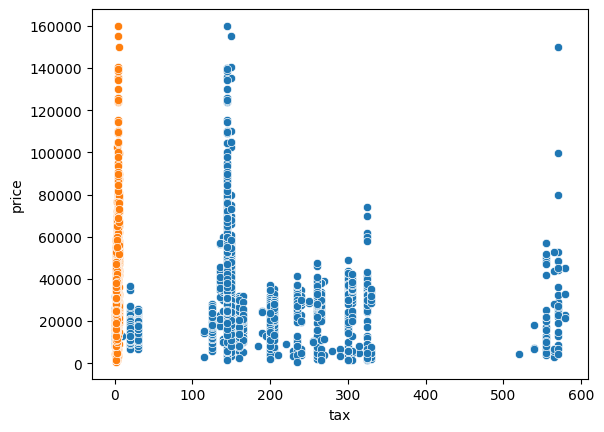

In [ ]:
sbn.scatterplot(x = "tax", y =  "price", data = dataFrame)

sbn.scatterplot(x = "engineSize", y = "price", data = dataFrame)

# Make decision for extreme values: extra expensive cars



Removing extreme values in data simplify model and it doesn't affect in significant way.

<Axes: xlabel='price', ylabel='Count'>

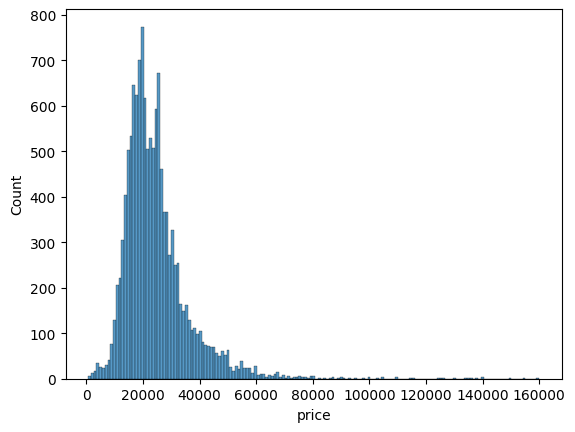

In [ ]:
sbn.histplot(dataFrame["price"])

In [ ]:
# Sort prices from highest to lowest
dataFrame.sort_values("price", ascending= False).head(20)

,year,price,mileage,tax,mpg,engineSize
6199,2020,159999,1350,145,21.4,4.0
10044,2020,154998,3000,150,21.4,4.0
5,2011,149948,3000,570,21.4,6.2
8737,2019,140319,785,150,22.1,4.0
6386,2018,139995,13046,145,21.4,4.0
8,2019,139948,12000,145,21.4,4.0
9133,2019,139559,1000,145,22.1,4.0
8821,2020,138439,1000,145,22.1,4.0
5902,2018,135771,19000,145,21.4,4.0
7864,2018,135124,18234,150,21.4,4.0


In [ ]:
len(dataFrame)

13119

In [ ]:
# Remove %0.1 extreme values
len(dataFrame)* 0.01

131.19

In [ ]:
# New data after removing the 131 most expensive cars
newDataFrame = dataFrame.sort_values("price", ascending = False).iloc[131:]

# Check average price by year to see extreme values if there are

In [ ]:
# Average price by year:
newDataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

--> The average price in 1970 seems extreme. In this optional operation, it is preferable to remove the 1970 data from the data.

In [ ]:
newDataFrame =newDataFrame[dataFrame.year !=1970]

<ipython-input-21-1801e89e13c4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newDataFrame =newDataFrame[dataFrame.year !=1970]


In [ ]:
# Checking after remove
newDataFrame[newDataFrame.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

# MODEL BUILDING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# x = features and y = target label
x = dataFrame.drop("price", axis =1).values  # Target layer dışında diğerlerini al
y = dataFrame["price"].values

# Split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 10)


In [ ]:
len(x_train)

8789

In [ ]:
len(x_test)

4330

# Scaling:
Scaling is applied to x data, i.e. x_train and x_test.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Create a scaler object
scaler = MinMaxScaler()

# Fit and transform x values by scaler

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Building Model and Layers

In [ ]:
# For model
from tensorflow.keras.models import Sequential

In [ ]:
# For layers
from tensorflow.keras.layers import Dense

In [ ]:
x_train.shape

(8789, 5)

In [ ]:
# Create model object:
model = Sequential()

# Create Layers: 4 hidden layers and ever layer include 12 neuron
model.add(Dense(12, activation =  "relu" ))
model.add(Dense(12, activation =  "relu" ))
model.add(Dense(12, activation =  "relu" ))
model.add(Dense(12, activation =  "relu" ))

# Create output layer
model.add(Dense(1))

In [ ]:
# Compile, optimize cost function
model.compile(optimizer = "adam", loss= "mse", learning_rate = 0.01 )

NameError: name 'model' is not defined

# Train

In [ ]:

model.fit(x = x_train, y =  y_train, validation_data = (x_test, y_test), batch_size = 250, epochs = 300)


Epoch 1/300
36/36 [==============================] - 2s 9ms/step - loss: 740136128.0000 - val_loss: 770784448.0000
Epoch 2/300
36/36 [==============================] - 0s 4ms/step - loss: 740110464.0000 - val_loss: 770736768.0000
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 740022144.0000 - val_loss: 770587968.0000
Epoch 4/300
36/36 [==============================] - 0s 4ms/step - loss: 739775296.0000 - val_loss: 770202624.0000
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 739166016.0000 - val_loss: 769279552.0000
Epoch 6/300
36/36 [==============================] - 0s 4ms/step - loss: 737779392.0000 - val_loss: 767255296.0000
Epoch 7/300
36/36 [==============================] - 0s 5ms/step - loss: 734822336.0000 - val_loss: 763069824.0000
Epoch 8/300
36/36 [==============================] - 0s 5ms/step - loss: 728984064.0000 - val_loss: 755114176.0000
Epoch 9/300
36/36 [==============================] - 0s 4ms/step - loss: 7183789

# Compare Loss and Validation loss


In [ ]:
lossData = pd.DataFrame(model.history.history)
lossData.head()

,loss,val_loss
0,740136128.0,770784448.0
1,740110464.0,770736768.0
2,740022144.0,770587968.0
3,739775296.0,770202624.0
4,739166016.0,769279552.0


<Axes: >

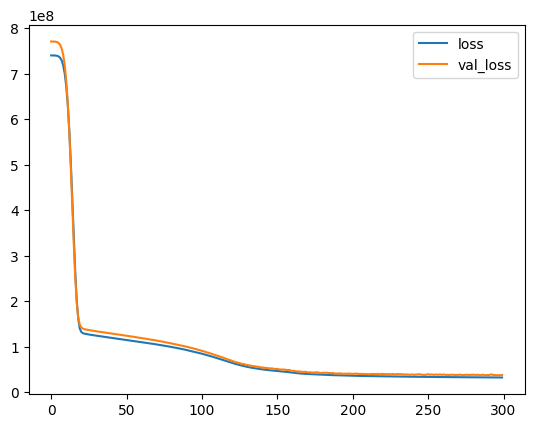

In [ ]:
lossData.plot()

In [ ]:
# No overfitting situation occurred :)

# Prediction

In [ ]:
prediction = model.predict(x_test)
prediction

136/136 [==============================] - 1s 4ms/step


array([[37326.996],
       [28864.402],
       [38859.89 ],
       ...,
       [27533.715],
       [29099.602],
       [22971.055]], dtype=float32)

# MSE and MAE
MSE: Mean Squared Error
MAE: Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Compare Predicted values and Real values:
mean_absolute_error(prediction, y_test)


3780.3382058863826

 👾👾👾 Output of Mean Absolute Error shows how much deviation is possible in the prediction model.
= $3780

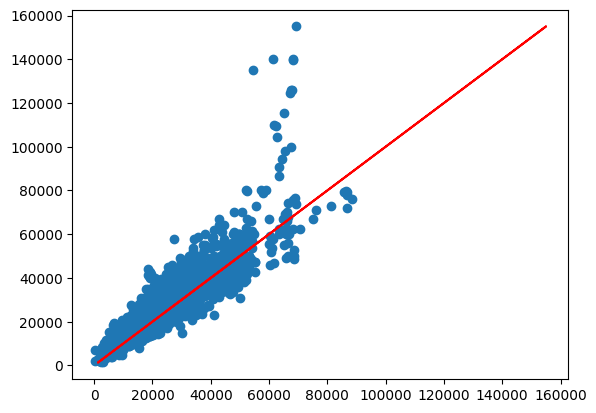

In [ ]:
plt.scatter(prediction, y_test)
plt.plot(y_test, y_test, "r")

# Test performance of prediction

In [ ]:
# Use the properties of the car in the 2nd index in the dataframe. Extract the “price” data to be predicted.
NewCar = dataFrame.drop("price", axis = 1).iloc[2]

In [ ]:
 # Real value:
 realPrice = dataFrame.iloc[2]["price"]

In [ ]:
# Scale new data
  #For this series, I reshaped it because it gave a 2D error.
NewCarSeries = scaler.transform(NewCar.values.reshape(-1,5))

# Prediction:
predictionNewCar = model.predict(NewCarSeries)


1/1 [==============================] - 0s 24ms/step


# Result:

- REAL VALUE = 49948.0
- PREDICTED VALUE = 57602.566

In [ ]:
# Mean Absolute Percentage Error:
mape = np.mean(np.abs((realPrice - predictionNewCar) / realPrice)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 15.325070917606354


🍿🍿🍿